# Gathering

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
image_predictions = pd.read_csv(io.StringIO(response.content.decode('utf-8')), sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
tweet = api.get_status(892420643555336193, tweet_mode='extended',wait_on_rate_limit =True)

In [8]:
tweet.full_text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [9]:
tweet

Status(_api=<tweepy.api.API object at 0x000001FE1E3AFA58>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 

In [10]:
tweet.user.followers_count

7968326

In [11]:
tweet.retweet_count

8203

In [12]:
tweet_ids = twitter_archive_enhanced['tweet_id']

In [13]:
tweet._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [14]:
cycle = 0
fails_dict = dict()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        cycle += 1
        print(str(cycle) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit =True)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [15]:
# tweet_test_statues = api.get_status('872261713294495745')

In [16]:
tweet_list = []
cycle = 0
with open('tweet_json.txt') as json_file:
    for line in json_file:
        cycle += 1
        tweet_info = json.loads(line)
        tweet_list.append({'tweet_id':tweet_info['id_str']
                           ,'retweet_count':tweet_info['retweet_count']
                           ,'favorite_count':tweet_info['favorite_count']})
        #if cycle == 10:
        #    print(tweet_list)
        #    break

In [17]:
tweepy_json_df = pd.DataFrame(tweet_list, columns = ['tweet_id','retweet_count','favorite_count'])

In [18]:
tweepy_json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8203,37624
1,892177421306343426,6068,32333
2,891815181378084864,4011,24362
3,891689557279858688,8365,40953
4,891327558926688256,9058,39153
5,891087950875897856,3008,19691
6,890971913173991426,1988,11513
7,890729181411237888,18227,63490
8,890609185150312448,4128,27077
9,890240255349198849,7125,31024


# Assess

In [19]:
tweepy_json_df.to_csv('tweepy_json_df.csv',index=False)
image_predictions.to_csv('image_predictions.csv',index=False)
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
twitter_archive_enhanced['rating_numerator'].isna().any()

False

In [21]:
twitter_archive_enhanced['rating_denominator'].isna().any()

False

In [22]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
archive_retweets = twitter_archive_enhanced['in_reply_to_status_id'].dropna()
archive_retweets

30      8.862664e+17
55      8.816070e+17
64      8.795538e+17
113     8.707262e+17
148     8.634256e+17
149     6.671522e+17
179     8.571567e+17
184     8.558181e+17
186     8.562860e+17
188     8.558616e+17
189     8.558585e+17
218     8.503288e+17
228     8.482121e+17
234     8.476062e+17
251     7.590995e+17
274     8.406983e+17
290     8.381455e+17
291     8.380855e+17
313     8.352460e+17
342     8.320875e+17
346     8.319030e+17
387     8.265984e+17
409     8.233264e+17
427     8.211526e+17
498     8.131273e+17
513     8.116272e+17
565     7.331095e+17
570     8.018543e+17
576     8.008580e+17
611     7.971238e+17
            ...     
1479    6.935722e+17
1497    6.924173e+17
1501    6.920419e+17
1523    6.903413e+17
1598    6.860340e+17
1605    6.855479e+17
1618    6.849598e+17
1630    6.844811e+17
1634    6.842229e+17
1663    6.827884e+17
1689    6.813394e+17
1774    6.780211e+17
1819    6.765883e+17
1842    6.757073e+17
1844    6.758457e+17
1852    6.754971e+17
1866    6.749

In [26]:
archive_retweets.dtype

dtype('float64')

In [27]:
len(twitter_archive_enhanced['in_reply_to_status_id'].dropna())

78

In [28]:
twitter_archive_enhanced['in_reply_to_status_id'].isnull().sum()

2278

In [29]:
len(twitter_archive_enhanced)

2356

In [30]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
tweepy_json_df.describe()

,retweet_count,favorite_count
count,2336.000000,2336.000000
mean,2885.418664,7863.541096
std,4874.241182,12188.004345
min,1.000000,0.000000
25%,579.250000,1365.500000
50%,1346.500000,3420.500000
75%,3361.500000,9634.500000
max,82660.000000,162525.000000


In [34]:
tweepy_json_df[tweepy_json_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [35]:
tweepy_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
tweet_id          2336 non-null object
retweet_count     2336 non-null int64
favorite_count    2336 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [36]:
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 856602993587888130: tweepy.error.TweepError([{'code': 144,
  

In [37]:
len(fails_dict)

20

## Quality Issues
### twitter_archive_enhance:
- There are 78 tweets that have a in_reply_to_status_id.
- Once all values have been removed from `in_reply_to_status_id` and `in_reply_to_user_id` they will be empty.
- Even though tweets were reweeted more than once, not only are they mostly blank in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`, which contradicts the data gather in the tweepy_json dataset, it doesn't make sense that the ones that are filled only have one retweet attached to them.
- `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are floats not strings.
- The `source` is an html tag which contains the source of the tweet of which is either "Twitter for iPhone, "Twitter Web Client, "Vine - Make a scene" or "TweetDeck".
- The data type in the `source` is an object rather than a category.
- The `timestamp` clumn is of type object.

### image_predictions
- img_num should be a string not a float


## Tidiness Issues

- Merging all three tables and exporting to csv once all other cleaning is done

### twitter_archive_enhance:
- The `text` column contains the tweet text, the rating and shortened tweet url.
- doggo, floofer, pupper, puppo are all have their own columns





# Clean

In [134]:
tweepy_json_clean = tweepy_json_df.copy()
image_predictions_clean = image_predictions.copy()
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

#### Dropping Invalid Tweets

##### Define

*The data that has been collected should only be new tweets, not tweets that are in response to another, tweets that are originally responses will be removed from all data sources*<br/>
The invalid tweets will be gathered and dropped from all three cleaned datasets.

##### Code

In [135]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Once cleaning is done there should be at most 78 less rows in the following tables

In [136]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [137]:
tweepy_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
tweet_id          2336 non-null object
retweet_count     2336 non-null int64
favorite_count    2336 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [138]:
archive_retweets_clean = twitter_archive_enhanced_clean['in_reply_to_status_id'].notnull()
archive_retweets_clean.value_counts()

False    2278
True       78
Name: in_reply_to_status_id, dtype: int64

In [139]:
reply_ids = twitter_archive_enhanced_clean[archive_retweets_clean]['in_reply_to_status_id']
reply_ids

30      8.862664e+17
55      8.816070e+17
64      8.795538e+17
113     8.707262e+17
148     8.634256e+17
149     6.671522e+17
179     8.571567e+17
184     8.558181e+17
186     8.562860e+17
188     8.558616e+17
189     8.558585e+17
218     8.503288e+17
228     8.482121e+17
234     8.476062e+17
251     7.590995e+17
274     8.406983e+17
290     8.381455e+17
291     8.380855e+17
313     8.352460e+17
342     8.320875e+17
346     8.319030e+17
387     8.265984e+17
409     8.233264e+17
427     8.211526e+17
498     8.131273e+17
513     8.116272e+17
565     7.331095e+17
570     8.018543e+17
576     8.008580e+17
611     7.971238e+17
            ...     
1479    6.935722e+17
1497    6.924173e+17
1501    6.920419e+17
1523    6.903413e+17
1598    6.860340e+17
1605    6.855479e+17
1618    6.849598e+17
1630    6.844811e+17
1634    6.842229e+17
1663    6.827884e+17
1689    6.813394e+17
1774    6.780211e+17
1819    6.765883e+17
1842    6.757073e+17
1844    6.758457e+17
1852    6.754971e+17
1866    6.749

In [140]:
len(reply_ids)

78

In [141]:
reply_ids_list = reply_ids.tolist()
reply_ids_list

[8.862663570751283e+17,
 8.816070373140521e+17,
 8.795538273341727e+17,
 8.707262027424932e+17,
 8.634256455687741e+17,
 6.671521640794235e+17,
 8.571566780553421e+17,
 8.55818117272019e+17,
 8.562860041095537e+17,
 8.558615844633518e+17,
 8.558585356070011e+17,
 8.503288187788206e+17,
 8.482121117298401e+17,
 8.476061755961385e+17,
 7.590995235327795e+17,
 8.406983002988626e+17,
 8.381454986911949e+17,
 8.380855393624023e+17,
 8.35245984028504e+17,
 8.320875475599974e+17,
 8.319030442248356e+17,
 8.265983652700078e+17,
 8.233263893362442e+17,
 8.21152592717697e+17,
 8.13127251579564e+17,
 8.116272330434806e+17,
 7.33109485275861e+17,
 8.018543306724475e+17,
 8.008579544172626e+17,
 7.97123751162839e+17,
 7.727430194476073e+17,
 7.667118193648886e+17,
 7.638651745539645e+17,
 7.501804988324045e+17,
 7.476486538174136e+17,
 7.468859193875743e+17,
 6.914168664520827e+17,
 7.384119198962852e+17,
 7.291135312709919e+17,
 7.079800658926674e+17,
 7.03255935813288e+17,
 6.671521640794235e+17,

In [142]:
len(reply_ids_list)

78

In [143]:
image_prediction_invalid_tweets = image_predictions_clean[image_predictions_clean.tweet_id.isin(reply_ids_list)]
image_prediction_invalid_tweets

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
184,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,Chihuahua,0.973990,True,French_bulldog,0.010832,True,Pekinese,0.002099,True
313,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True
409,673715861853720576,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,1,suit,0.404115,False,bow_tie,0.294683,False,Windsor_tie,0.132701,False
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
450,674739953134403584,https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg,1,Dandie_Dinmont,0.175915,True,black-footed_ferret,0.096534,False,toy_poodle,0.064145,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
460,674793399141146624,https://pbs.twimg.com/media/CV1ZA3oWEAA1HW_.jpg,1,giant_schnauzer,0.119693,True,Afghan_hound,0.072763,True,miniature_schnauzer,0.063786,True
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True


In [144]:
len(image_prediction_invalid_tweets)

30

In [145]:
image_prediction_invalid_tweets.index

Int64Index([  56,  103,  184,  313,  409,  441,  450,  452,  460,  463,  479,
             486,  493,  500,  642,  666,  696,  715,  724,  800,  811,  831,
             854,  930, 1138, 1155, 1344, 1660, 1673, 1888],
           dtype='int64')

In [146]:
len(twitter_archive_enhanced_clean)

2356

In [147]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['in_reply_to_status_id'].isna()]

In [148]:
len(image_predictions_clean)

2075

In [149]:
image_predictions_clean.drop(image_prediction_invalid_tweets.index.tolist(), inplace = True)

In [150]:
tweepy_json_clean['tweet_id'] = tweepy_json_clean['tweet_id'].astype('int64')

Will convert back to string in later step

In [151]:
tweepy_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 3 columns):
tweet_id          2336 non-null int64
retweet_count     2336 non-null int64
favorite_count    2336 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [152]:
tweepy_json_invalid_tweets = tweepy_json_clean[tweepy_json_clean.tweet_id.isin(reply_ids_list)]
tweepy_json_invalid_tweets

,tweet_id,retweet_count,favorite_count
184,855818117272018944,5545,26782
221,848212111729840128,3192,16725
486,813127251579564032,3384,12534
500,811627233043480576,3373,13521
879,759099523532779520,4448,15203
988,747648653817413632,6191,13416
1095,733109485275860992,17690,50931
1112,729113531270991872,343,1948
1344,703041949650034688,13179,27290
1429,696488710901260288,1083,2630


In [153]:
len(tweepy_json_clean)

2336

In [154]:
tweepy_json_clean.drop(tweepy_json_invalid_tweets.index.tolist(), inplace = True)

##### Test

In [155]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [156]:
len(twitter_archive_enhanced_clean)

2278

In [157]:
twitter_archive_enhanced_clean.in_reply_to_status_id.isna().value_counts()

True    2278
Name: in_reply_to_status_id, dtype: int64

In [158]:
len(image_predictions_clean)

2045

In [159]:
len(tweepy_json_clean)

2303

Previously these tables showed slightly larger sizes before cleaning was done. I double checked earlier that I was removing items by the actual tweet id and not the dataframe index which could've led to inaccurate removal.

#### Removing Irrelevant Columns

##### Define

*The columns `in_reply_to_status_id`, `in_reply_to_user_id` are now all nan values and `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` don't make sense to have because far more than what's in the dataset was retweeted, and whatever was retweeted was retweeted more than once which indicates that the data in these columns add unecessary noise.*<br/>
These columns will be dropped from the clean dataset.

##### Code

In [160]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

As you can see `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are all still in the dataset.

In [161]:
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test

In [162]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


As you can see `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are no longer present.

#### Certain Column Data Types should be Strings instead of ints

##### Define

*`tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are floats not strings. These are simple numeric labels not measurements of any sort*<br/>
Since all the other columns have been removed, I will convert the data type of all values in `tweet_id` from ints to strings in all three datasets.

##### Code

In [163]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


In [164]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2045 non-null int64
jpg_url     2045 non-null object
img_num     2045 non-null int64
p1          2045 non-null object
p1_conf     2045 non-null float64
p1_dog      2045 non-null bool
p2          2045 non-null object
p2_conf     2045 non-null float64
p2_dog      2045 non-null bool
p3          2045 non-null object
p3_conf     2045 non-null float64
p3_dog      2045 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 165.8+ KB


In [165]:
tweepy_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2335
Data columns (total 3 columns):
tweet_id          2303 non-null int64
retweet_count     2303 non-null int64
favorite_count    2303 non-null int64
dtypes: int64(3)
memory usage: 72.0 KB


In [166]:
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweepy_json_clean['tweet_id'] = tweepy_json_clean['tweet_id'].astype(str)

##### Test

In [167]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(2), object(10)
memory usage: 231.4+ KB


In [168]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2045 non-null object
jpg_url     2045 non-null object
img_num     2045 non-null int64
p1          2045 non-null object
p1_conf     2045 non-null float64
p1_dog      2045 non-null bool
p2          2045 non-null object
p2_conf     2045 non-null float64
p2_dog      2045 non-null bool
p3          2045 non-null object
p3_conf     2045 non-null float64
p3_dog      2045 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 165.8+ KB


In [169]:
tweepy_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2335
Data columns (total 3 columns):
tweet_id          2303 non-null object
retweet_count     2303 non-null int64
favorite_count    2303 non-null int64
dtypes: int64(2), object(1)
memory usage: 72.0+ KB


##### Define

*The `source` is an html tag which contains the source of the tweet of which is either "Twitter for iPhone, "Twitter Web Client, "Vine - Make a scene" or "TweetDeck".*<br/>
In the `source` column in twitter_archive_enhanced_clean, the items will be striped of their htlm tags.

##### Code

In [170]:
from bs4 import BeautifulSoup

In [171]:
twitter_archive_enhanced_clean['source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [172]:
html = twitter_archive_enhanced_clean['source'].iloc[0]
html

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [173]:
soup = BeautifulSoup(html)

In [174]:
print(soup.text)

Twitter for iPhone


In [175]:
def extract_text_from_html(html):
    soup = BeautifulSoup(html)
    text = soup.text
    return text

In [176]:
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].apply(extract_text_from_html)

##### Test

In [177]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['source'] == 'Twitter for iPhone']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [178]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['source'] != 'Twitter for iPhone']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
209,852226086759018497,2017-04-12 18:25:07 +0000,Twitter Web Client,Meet General. He wasn't content with the quali...,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None
270,841314665196081154,2017-03-13 15:47:01 +0000,Twitter Web Client,This is Max. There's no way in h*ck you're tak...,https://twitter.com/dog_rates/status/841314665...,13,10,Max,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57 +0000,Twitter Web Client,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
352,831315979191906304,2017-02-14 01:35:49 +0000,Twitter Web Client,I couldn't make it to the #WKCDogShow BUT I ha...,https://twitter.com/dog_rates/status/831315979...,13,10,None,None,None,pupper,None
375,828361771580813312,2017-02-05 21:56:51 +0000,Twitter Web Client,Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
444,819238181065359361,2017-01-11 17:42:57 +0000,Twitter Web Client,Some happy pupper news to share. 10/10 for eve...,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None
529,808344865868283904,2016-12-12 16:16:49 +0000,Vine - Make a Scene,This is Seamus. He's very bad at entering pool...,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,2016-11-26 19:50:26 +0000,Vine - Make a Scene,This is Bailey. She has mastered the head tilt...,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,2016-10-27 22:53:48 +0000,Vine - Make a Scene,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
672,789903600034189313,2016-10-22 18:57:48 +0000,Vine - Make a Scene,This is Ralphy. His dreams were just shattered...,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None


In [179]:
len(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['source'] != 'Twitter for iPhone']) + len(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['source'] == 'Twitter for iPhone'])

2278

#### The `source` column objects should be of type of 'category'.

##### Define

*The data type in the `source` is an object rather than a category.*<br/>
Similar to the tweet_ids earlier, all the objects in the `source` column will be changed to category.

In [180]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(2), object(10)
memory usage: 231.4+ KB


In [181]:
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].astype('category')

##### Test

In [182]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null object
source                2278 non-null category
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: category(1), int64(2), object(9)
memory usage: 216.0+ KB


#### Spliting the `text` column

##### Define

*The `text` column contains the tweet text, the rating and shortened tweet url.*<br/>
I'm going to use regex to split the `text` column into two columns, the other being `shortended url`.

##### Code

In [183]:
random_sample = twitter_archive_enhanced_clean['text'].sample(1)
random_sample

676    HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...
Name: text, dtype: object

In [184]:
random_sample.values

array(['HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOOD DOGGI ALL THE TIME MISTAKES HAPPEN 13/10\nhttps://t.co/G2ms0A5jWM'],
      dtype=object)

In [185]:
random_sample

676    HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...
Name: text, dtype: object

In [186]:
random_sample.str.extract('(https?://t.*)', expand = True)

,0
676,https://t.co/G2ms0A5jWM


In [187]:
text = random_sample.str.extract('^(.*?)https?://t.*', expand = True)
text

,0
676,NaN


In [188]:
text.values

array([[nan]], dtype=object)

In [189]:
twitter_archive_enhanced_clean['shortend_url'] = twitter_archive_enhanced_clean['text'].str.extract('(https?://t.*)', expand = True)

In [190]:
twitter_archive_enhanced_clean['text'] = twitter_archive_enhanced_clean['text'].str.extract('^(.*?)https?://t.*', expand = True)

##### Test

In [191]:
twitter_archive_enhanced_clean['shortend_url']

0                               https://t.co/MgUWQ76dJU
1                               https://t.co/0Xxu71qeIV
2                               https://t.co/wUnZnhtVJB
3                               https://t.co/tD36da7qLQ
4                               https://t.co/AtUZn91f7f
5                               https://t.co/kQ04fDDRmh
6       https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7                               https://t.co/v0nONBcwxq
8                               https://t.co/9TwLuAGH0b
9                               https://t.co/t1bfwz5S2A
10                              https://t.co/dVPW0B0Mme
11                              https://t.co/u1XPQMl29g
12                              https://t.co/BxvuXk0UCm
13                              https://t.co/f8dEDcrKSR
14                              https://t.co/y70o6h3isq
15                              https://t.co/WpHvrQedPb
16                              https://t.co/chxruIOUJN
17                              https://t.co/HTQ

In [192]:
twitter_archive_enhanced_clean.shortend_url.isna().value_counts()

False    2227
True       51
Name: shortend_url, dtype: int64

In [193]:
twitter_archive_enhanced_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6                                                     NaN
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [194]:
twitter_archive_enhanced_clean['text'].isna().value_counts()

False    2149
True      129
Name: text, dtype: int64

I can say that for the most part, this bit of cleaning was sucessful, however it may be a good idea to go back and handle the missing values later.

#### Convert img_num data type to a string

##### Define

*img_num in image_predictions_clean should be a string not a float.*
I going to convert all objects in `img_num` from a float to a string.

##### Code

In [195]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2045 non-null object
jpg_url     2045 non-null object
img_num     2045 non-null int64
p1          2045 non-null object
p1_conf     2045 non-null float64
p1_dog      2045 non-null bool
p2          2045 non-null object
p2_conf     2045 non-null float64
p2_dog      2045 non-null bool
p3          2045 non-null object
p3_conf     2045 non-null float64
p3_dog      2045 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 165.8+ KB


In [196]:
image_predictions_clean['img_num'] = image_predictions_clean['img_num'].astype(str)

##### Test

In [197]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2045 non-null object
jpg_url     2045 non-null object
img_num     2045 non-null object
p1          2045 non-null object
p1_conf     2045 non-null float64
p1_dog      2045 non-null bool
p2          2045 non-null object
p2_conf     2045 non-null float64
p2_dog      2045 non-null bool
p3          2045 non-null object
p3_conf     2045 non-null float64
p3_dog      2045 non-null bool
dtypes: bool(3), float64(3), object(6)
memory usage: 165.8+ KB


img_num is now of data type object.

#### Make three columns into one

##### Define

*doggo, floofer, pupper, puppo in twitter_archive_enhanced_clean are all have their own columns*<br/>
Melt these columns together

##### Code

In [198]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,shortend_url
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f


In [199]:
twitter_archive_enhanced_clean.columns.values

array(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'shortend_url'], dtype=object)

In [200]:
twitter_archive_enhanced_clean.doggo.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.floofer.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.puppo.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.pupper.replace('None', '', inplace=True)

In [201]:
twitter_archive_enhanced_clean.doggo.value_counts()

         2185
doggo      93
Name: doggo, dtype: int64

In [202]:
twitter_archive_enhanced_clean.floofer.value_counts()

           2268
floofer      10
Name: floofer, dtype: int64

In [203]:
twitter_archive_enhanced_clean['dog_status'] = (twitter_archive_enhanced_clean.doggo 
                                                + twitter_archive_enhanced_clean.floofer 
                                                + twitter_archive_enhanced_clean.puppo
                                                + twitter_archive_enhanced_clean.pupper)

In [204]:
twitter_archive_enhanced_clean['dog_status'].value_counts()

                1906
pupper           242
doggo             80
puppo             28
doggopupper       11
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_status, dtype: int64

In [205]:
twitter_archive_enhanced_clean['dog_status']

0             
1             
2             
3             
4             
5             
6             
7             
8             
9        doggo
10            
11            
12       puppo
13            
14       puppo
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28            
29      pupper
         ...  
2326          
2327          
2328          
2329          
2330          
2331          
2332          
2333          
2334          
2335          
2336          
2337          
2338          
2339          
2340          
2341          
2342          
2343          
2344          
2345          
2346          
2347          
2348          
2349          
2350          
2351          
2352          
2353          
2354          
2355          
Name: dog_status, Length: 2278, dtype: object

In [206]:
twitter_archive_enhanced_clean['dog_status'].replace('', 'None', inplace=True)

##### Test

In [207]:
twitter_archive_enhanced_clean['dog_status']

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9        doggo
10        None
11        None
12       puppo
13        None
14       puppo
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29      pupper
         ...  
2326      None
2327      None
2328      None
2329      None
2330      None
2331      None
2332      None
2333      None
2334      None
2335      None
2336      None
2337      None
2338      None
2339      None
2340      None
2341      None
2342      None
2343      None
2344      None
2345      None
2346      None
2347      None
2348      None
2349      None
2350      None
2351      None
2352      None
2353      None
2354      None
2355      None
Name: dog_status, Length: 2278, dtype: object

In [208]:
len(twitter_archive_enhanced_clean)

2278

#### Drop extra dog status columns

##### Define

Remove the extra dog columns that were made obsolete in the previous step

##### Code

In [209]:
twitter_archive_enhanced_clean.columns.values

array(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'shortend_url', 'dog_status'],
      dtype=object)

In [210]:
twitter_archive_enhanced_clean.drop(['doggo','floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [211]:
twitter_archive_enhanced_clean.columns.values

array(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'shortend_url',
       'dog_status'], dtype=object)

#### Join all three tables

Join all three table into one master dataset

##### Code

In [212]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [213]:
master_tweeter_data = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean, on='tweet_id', how='left')

In [214]:
master_tweeter_data = pd.merge(master_tweeter_data, tweepy_json_clean, on='tweet_id', how='left')

##### Test

In [215]:
master_tweeter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 23 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null object
source                2278 non-null category
text                  2149 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
shortend_url          2227 non-null object
dog_status            2278 non-null object
jpg_url               2026 non-null object
img_num               2026 non-null object
p1                    2026 non-null object
p1_conf               2026 non-null float64
p1_dog                2026 non-null object
p2                    2026 non-null object
p2_conf               2026 non-null float64
p2_dog                2026 non-null object
p3                    2026 non-null object
p3_conf               2026 non-null float64
p3_dog                2026 non

In [216]:
master_tweeter_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,shortend_url,dog_status,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8203.0,37624.0
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6068.0,32333.0
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4011.0,24362.0
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8365.0,40953.0
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9058.0,39153.0


### The timestamp clumn is of type object.

##### Define

I'm going to convert the `timestamp` column to data type datetime.

##### Code

In [217]:
master_tweeter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 23 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null object
source                2278 non-null category
text                  2149 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
shortend_url          2227 non-null object
dog_status            2278 non-null object
jpg_url               2026 non-null object
img_num               2026 non-null object
p1                    2026 non-null object
p1_conf               2026 non-null float64
p1_dog                2026 non-null object
p2                    2026 non-null object
p2_conf               2026 non-null float64
p2_dog                2026 non-null object
p3                    2026 non-null object
p3_conf               2026 non-null float64
p3_dog                2026 non

In [218]:
master_tweeter_data['timestamp'] 

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [219]:
master_tweeter_data['timestamp']  = pd.to_datetime(master_tweeter_data['timestamp'])
master_tweeter_data['timestamp'] 

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
5      2017-07-29 00:08:17+00:00
6      2017-07-28 16:27:12+00:00
7      2017-07-28 00:22:40+00:00
8      2017-07-27 16:25:51+00:00
9      2017-07-26 15:59:51+00:00
10     2017-07-26 00:31:25+00:00
11     2017-07-25 16:11:53+00:00
12     2017-07-25 01:55:32+00:00
13     2017-07-25 00:10:02+00:00
14     2017-07-24 17:02:04+00:00
15     2017-07-24 00:19:32+00:00
16     2017-07-23 00:22:39+00:00
17     2017-07-22 16:56:37+00:00
18     2017-07-22 00:23:06+00:00
19     2017-07-21 01:02:36+00:00
20     2017-07-20 16:49:33+00:00
21     2017-07-19 16:06:48+00:00
22     2017-07-19 03:39:09+00:00
23     2017-07-19 00:47:34+00:00
24     2017-07-18 16:08:03+00:00
25     2017-07-18 00:07:08+00:00
26     2017-07-17 16:17:36+00:00
27     2017-07-16 23:58:41+00:00
28     2017-07-16 20:14:00+00:00
29     2017-07-15 23:25:31+00:00
          

##### Test

In [220]:
master_tweeter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 23 columns):
tweet_id              2278 non-null object
timestamp             2278 non-null datetime64[ns, UTC]
source                2278 non-null category
text                  2149 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
shortend_url          2227 non-null object
dog_status            2278 non-null object
jpg_url               2026 non-null object
img_num               2026 non-null object
p1                    2026 non-null object
p1_conf               2026 non-null float64
p1_dog                2026 non-null object
p2                    2026 non-null object
p2_conf               2026 non-null float64
p2_dog                2026 non-null object
p3                    2026 non-null object
p3_conf               2026 non-null float64
p3_dog           

In [221]:
master_tweeter_data.to_csv('master_tweeter_data.csv', index=False)

In [222]:
master_tweeter_data.columns.values

array(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'shortend_url',
       'dog_status', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count'], dtype=object)

# Insights

In [223]:
master_tweeter_data['dog_status'].value_counts()

None            1906
pupper           242
doggo             80
puppo             28
doggopupper       11
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_status, dtype: int64

From these numbers we can see that of all the categories, pupper being the most popular. Even more interesting is that there are several cases where more than one dog status was selected. Further and more importantly the vast majority of subjects did not provide a dog status.

In [224]:
master_tweeter_data['rating_numerator'].describe()

count    2278.000000
mean       12.179104
std        38.752738
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [225]:
master_tweeter_data['rating_denominator'].describe()

count    2278.000000
mean       10.413521
std         6.376645
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

It's interesting to see that while for the most part the denominator is consistently 10 at the 25, 50 , and 75th percentile, the same cannot be said for the numerator where most people had it at 11 or 12.

In [226]:
master_tweeter_data['source'].value_counts()

Twitter for iPhone     2143
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

From here we can see that the vast majority of tweets were sent from an iphone.

In [227]:
master_tweeter_data['retweet_count'].describe()

count     2229.000000
mean      2956.723643
std       4937.911074
min         11.000000
25%        619.000000
50%       1410.000000
75%       3413.000000
max      82660.000000
Name: retweet_count, dtype: float64

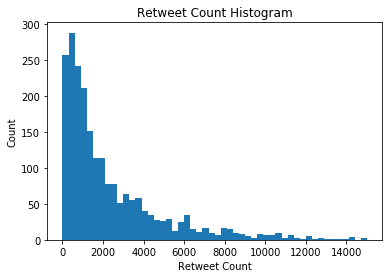

In [228]:
plt.hist(master_tweeter_data['retweet_count'],range=[0, 15000], bins=50)
plt.xlabel('Retweet Count')
plt.ylabel('Count')
plt.title('Retweet Count Histogram');

This plot is skewed right with most post having a relative low amount of retweets.